In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Read Data 
table = pd.read_csv('../csvs/combined_table.csv')
table.head()

table.columns


Index(['Unnamed: 0', 'Team', 'Pl', 'W', 'D', 'L', 'F', 'A', 'GD', 'Pts',
       'Win_Perc', 'Position', 'League_name'],
      dtype='object')

In [4]:
def standardise(i):
    return i/table['Pl']

tablelist = ['W', 'D', 'L', 'F', 'A']

for column in tablelist:
    table[column] = standardise(table[column])


table.head()

,Unnamed: 0,Team,Pl,W,D,L,F,A,GD,Pts,Win_Perc,Position,League_name
0,0,Liverpool,20,0.650000,0.300000,0.050000,2.150000,0.900000,25,45,65.00,1,Premier League
1,1,Manchester City,20,0.650000,0.200000,0.150000,2.400000,1.150000,25,43,65.00,2,Premier League
2,2,Arsenal,21,0.619048,0.190476,0.190476,2.000000,0.952381,22,43,61.90,3,Premier League
3,3,Aston Villa,21,0.619048,0.190476,0.190476,2.047619,1.285714,16,43,61.90,4,Premier League
4,4,Tottenham Hotspur,21,0.571429,0.190476,0.238095,2.095238,1.476190,13,40,57.14,5,Premier League


In [5]:
table = table.drop({'Unnamed: 0', 'Pts', 'Position', 'Win_Perc', 'Pl'}, axis=1)
table.head()

,Team,W,D,L,F,A,GD,League_name
0,Liverpool,0.650000,0.300000,0.050000,2.150000,0.900000,25,Premier League
1,Manchester City,0.650000,0.200000,0.150000,2.400000,1.150000,25,Premier League
2,Arsenal,0.619048,0.190476,0.190476,2.000000,0.952381,22,Premier League
3,Aston Villa,0.619048,0.190476,0.190476,2.047619,1.285714,16,Premier League
4,Tottenham Hotspur,0.571429,0.190476,0.238095,2.095238,1.476190,13,Premier League


In [6]:
features = ['W', 'D', 'L', 'F', 'A']


# Separating out the features
x = table.loc[:, features].values



# Standardizing the features
x = StandardScaler().fit_transform(x)



In [7]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


In [8]:
finalDf = pd.concat([principalDf, table[['Team', 'League_name']]], axis = 1)

In [9]:
display(finalDf)

,principal component 1,principal component 2,Team,League_name
0,-3.680770,0.912507,Liverpool,Premier League
1,-3.265895,-0.616841,Manchester City,Premier League
2,-2.825632,-0.281204,Arsenal,Premier League
3,-2.412982,-0.619301,Aston Villa,Premier League
4,-1.876050,-0.816068,Tottenham Hotspur,Premier League
5,-0.862673,-0.430936,West Ham United,Premier League
6,0.107493,-1.185442,Manchester United,Premier League
7,-0.802002,0.999104,Brighton and Hove Albion,Premier League
8,-0.393835,-0.513866,Chelsea,Premier League
9,-0.322947,-1.824994,Newcastle United,Premier League


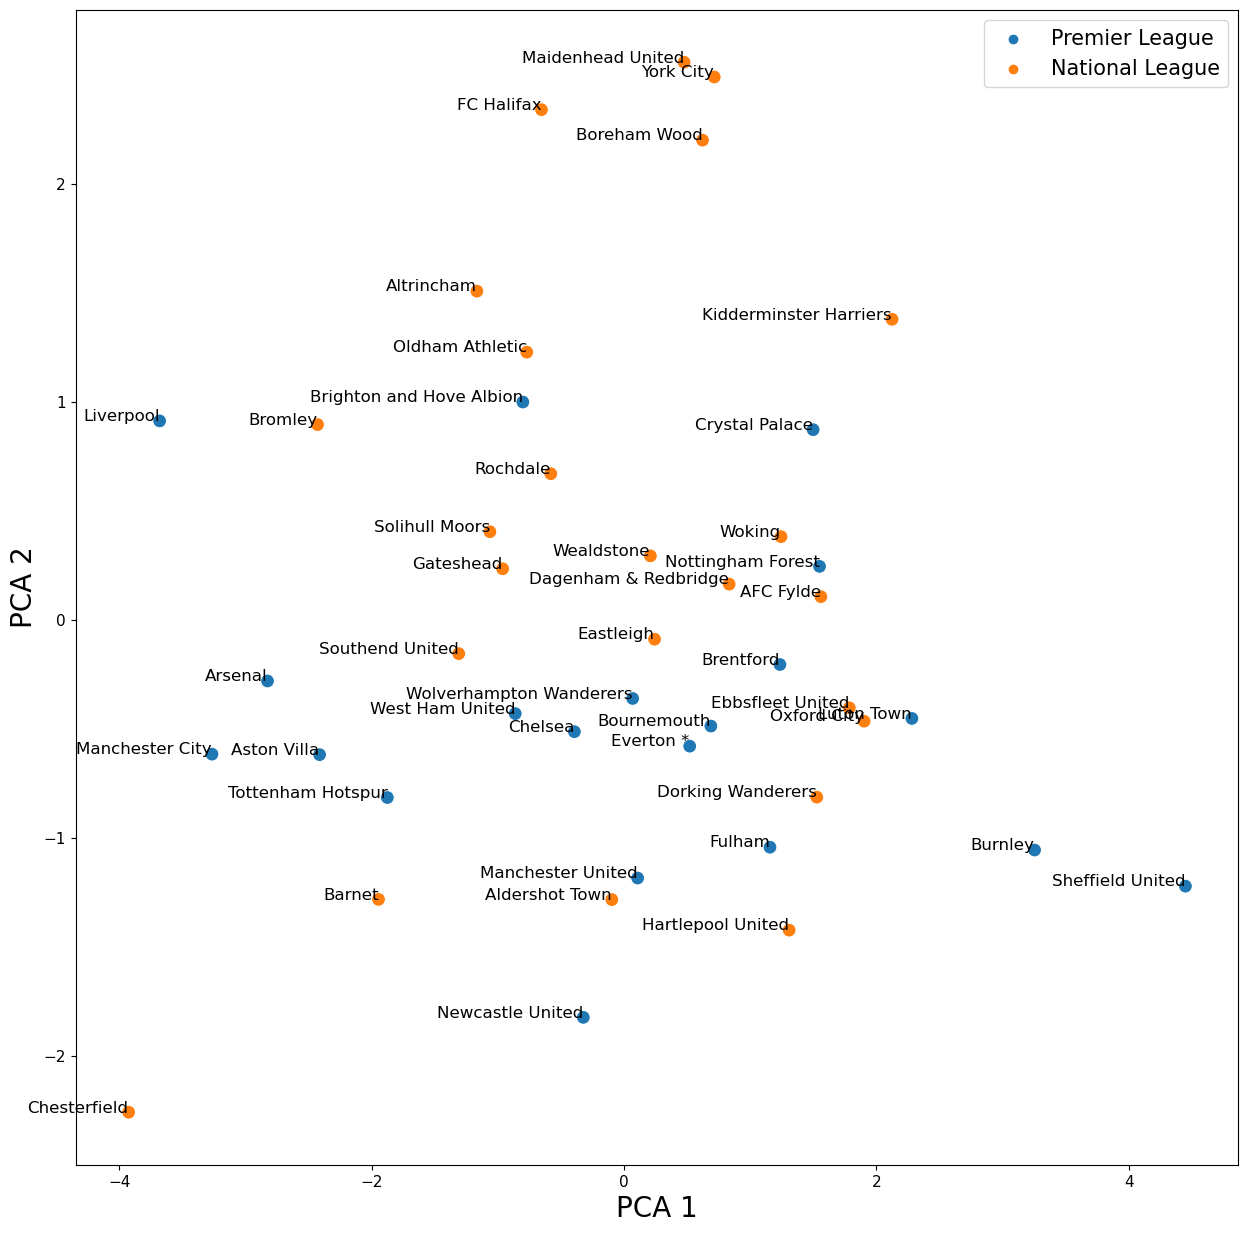

In [13]:
# Create a scatter plot
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.scatterplot(data=finalDf, x='principal component 1', y='principal component 2', hue='League_name', s = 100)

# Add data labels
for i in range(len(finalDf)):
    plt.text(finalDf['principal component 1'][i], finalDf['principal component 2'][i], finalDf['Team'][i],
             ha='right', fontsize=12)  # Adjust fontsize as needed

ax.set_xlabel('PCA 1', fontsize = 20)
ax.set_ylabel('PCA 2', fontsize = 20)
plt.xticks(fontsize=11)
plt.yticks(fontsize = 11)
plt.legend(fontsize = 15)
plt.savefig('PCA.pdf')

plt.show()

In [11]:
pca.explained_variance_ratio_ #Principal component 1 explains 69% of the variance, and Principal component 2 explains 21% of the variance , together explaining 90% of the variance

array([0.63588695, 0.25459505])

In [14]:
display(table)

,Team,W,D,L,F,A,GD,League_name
0,Liverpool,0.650000,0.300000,0.050000,2.150000,0.900000,25,Premier League
1,Manchester City,0.650000,0.200000,0.150000,2.400000,1.150000,25,Premier League
2,Arsenal,0.619048,0.190476,0.190476,2.000000,0.952381,22,Premier League
3,Aston Villa,0.619048,0.190476,0.190476,2.047619,1.285714,16,Premier League
4,Tottenham Hotspur,0.571429,0.190476,0.238095,2.095238,1.476190,13,Premier League
5,West Ham United,0.500000,0.200000,0.300000,1.650000,1.500000,3,Premier League
6,Manchester United,0.476190,0.095238,0.428571,1.142857,1.380952,-5,Premier League
7,Brighton and Hove Albion,0.400000,0.350000,0.250000,1.900000,1.650000,5,Premier League
8,Chelsea,0.428571,0.190476,0.380952,1.666667,1.476190,4,Premier League
9,Newcastle United,0.428571,0.095238,0.476190,1.952381,1.523810,9,Premier League
